In [1]:
## IMPORTING LIBRARIES 

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:

# ------------------------------
# Step 0: Create fictive data
# ------------------------------
np.random.seed(144)
plastic_type = np.random.choice(['Polycarbonate', 'ABS', 'Polypropylene'], size=1000, p=[0.5,0.3,0.2])
np.random.seed(145); melt_flow_index = np.random.uniform(5, 30, 1000)
np.random.seed(146); moisture_content = np.random.uniform(0.001, 0.1, 1000)
np.random.seed(147); injection_temperature = np.random.normal(250,25,1000)
np.random.seed(148); injection_pressure = np.random.uniform(10000,20000,1000)
np.random.seed(149); mold_temperature = np.random.normal(80,20,1000)
np.random.seed(150); cooling_time = np.random.normal(25,5,1000)
np.random.seed(151); screw_speed = np.random.normal(50,10,1000)
np.random.seed(152); clamp_force = np.random.normal(100,20,1000)

# ------------------------------
# Step 1: Put into dataframe
# ------------------------------
df = pd.DataFrame({
    'PlasticType': plastic_type,
    'meltFlowIndex_Gramsper10Min': melt_flow_index,
    'MoistureContent_Percentage': moisture_content,
    'InjectionTemperature_Celcius': injection_temperature,
    'InjectionpPressure_Bar': injection_pressure,
    'MoldTemperature_Celcius': mold_temperature,
    'CoolingTime_Seconds': cooling_time,
    'ScrewSpeed_RevolutionsPerMinute': screw_speed,
    'ClampForce_Tons': clamp_force,
})

# ------------------------------
# Step 2: Create latent "process efficiency" factor
# ------------------------------
cols_to_correlate = [
    'meltFlowIndex_Gramsper10Min',
    'MoistureContent_Percentage',
    'InjectionTemperature_Celcius',
    'InjectionpPressure_Bar',
    'MoldTemperature_Celcius',
    'CoolingTime_Seconds',
    'ScrewSpeed_RevolutionsPerMinute',
    'ClampForce_Tons'
]

scaler = StandardScaler()
X = scaler.fit_transform(df[cols_to_correlate])

# Latent efficiency factor = average of standardized process parameters
latent_efficiency = X.mean(axis=1)

# ------------------------------
# Step 3: Create dependent variables
# ------------------------------
# Cycle time: moderate negative correlation
df["CycleTime_Seconds"] = 75 + 5*latent_efficiency + np.random.normal(0,2,1000)

# Scrap rate: stronger negative correlation
df["ScrapRate_Percentage"] = 2.5 - 1.5*latent_efficiency + np.random.normal(0,0.3,1000)
df["ScrapRate_Percentage"] = df["ScrapRate_Percentage"].clip(lower=0)

# ------------------------------
# Step 4: Quick check of correlations
# ------------------------------
print(df.corr()[["CycleTime_Seconds","ScrapRate_Percentage"]].loc[cols_to_correlate])


                                 CycleTime_Seconds  ScrapRate_Percentage
meltFlowIndex_Gramsper10Min               0.182235             -0.287075
MoistureContent_Percentage                0.282532             -0.303128
InjectionTemperature_Celcius              0.199568             -0.283729
InjectionpPressure_Bar                    0.230606             -0.339294
MoldTemperature_Celcius                   0.175798             -0.263120
CoolingTime_Seconds                       0.225455             -0.272836
ScrewSpeed_RevolutionsPerMinute           0.229002             -0.293512
ClampForce_Tons                           0.168336             -0.312970


In [3]:
## SAVING TO DESKTOP 

import os

# File name
file_name = "smartphone_plastic_production.csv"

# Path to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", file_name)

# Export DataFrame to CSV
df.to_csv(desktop_path, index=True)

print(f"CSV file saved to: {desktop_path}")

CSV file saved to: /Users/Prakash/Desktop/smartphone_plastic_production.csv


In [4]:
## DESCRIPTIVE ANALYSIS OF DATA

import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Basic descriptive statistics
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Stats:\n", df.describe())

Dataset Shape: (1000, 11)

Data Types:
 PlasticType                         object
meltFlowIndex_Gramsper10Min        float64
MoistureContent_Percentage         float64
InjectionTemperature_Celcius       float64
InjectionpPressure_Bar             float64
MoldTemperature_Celcius            float64
CoolingTime_Seconds                float64
ScrewSpeed_RevolutionsPerMinute    float64
ClampForce_Tons                    float64
CycleTime_Seconds                  float64
ScrapRate_Percentage               float64
dtype: object

Missing Values:
 PlasticType                        0
meltFlowIndex_Gramsper10Min        0
MoistureContent_Percentage         0
InjectionTemperature_Celcius       0
InjectionpPressure_Bar             0
MoldTemperature_Celcius            0
CoolingTime_Seconds                0
ScrewSpeed_RevolutionsPerMinute    0
ClampForce_Tons                    0
CycleTime_Seconds                  0
ScrapRate_Percentage               0
dtype: int64

Descriptive Stats:
        meltFlo

## Descriptive analysis report:

The dataset contains 1000 observations and 11 features, with no missing values. It includes one categorical feature, 'PlasticType', and ten numerical features. Key process parameters such as injection temperature (mean 249.27 °C), injection pressure (mean 14895.65 Bar), mold temperature (mean 79.60 °C), cooling time (mean 24.92 seconds), and screw speed (mean 50.31 RPM) show moderate variability. The meltFlowIndex_Gramsper10Min varies from 5.01 to 29.91, while MoistureContent_Percentage ranges from 0.001 to 0.10. The CycleTime_Seconds has a mean of 74.99 seconds and a standard deviation of 2.67 seconds, indicating consistency. The ScrapRate_Percentage, a critical output, has a mean of 2.50% with a standard deviation of 0.59%, indicating a relatively low and consistent scrap rate across the samples. Both CycleTime_Seconds and ScrapRate_Percentage are identified as outcome variables.



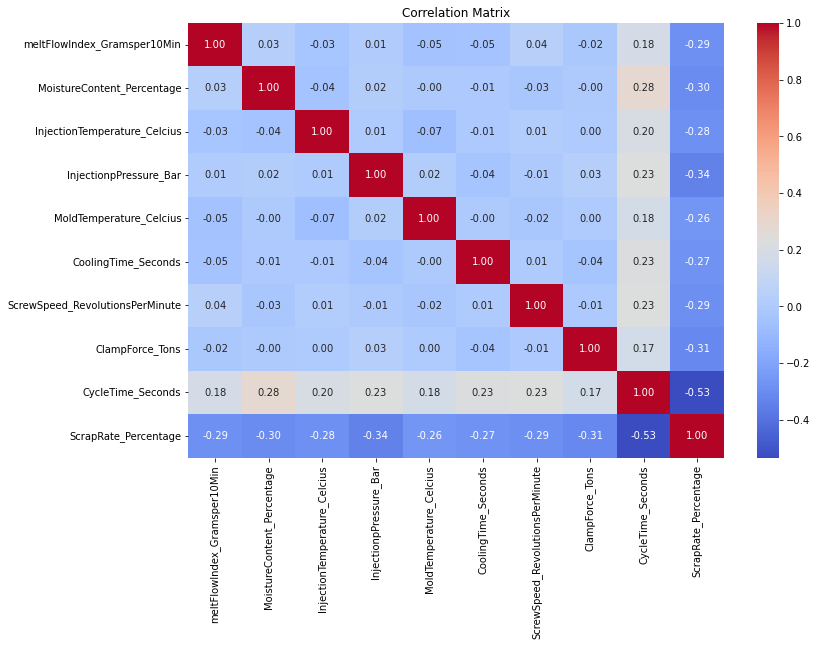


Top correlations with Scrap Rate:
ScrapRate_Percentage               1.000000
MoldTemperature_Celcius           -0.263120
CoolingTime_Seconds               -0.272836
InjectionTemperature_Celcius      -0.283729
meltFlowIndex_Gramsper10Min       -0.287075
ScrewSpeed_RevolutionsPerMinute   -0.293512
Name: ScrapRate_Percentage, dtype: float64

Bottom correlations with Scrap Rate:
meltFlowIndex_Gramsper10Min       -0.287075
ScrewSpeed_RevolutionsPerMinute   -0.293512
MoistureContent_Percentage        -0.303128
ClampForce_Tons                   -0.312970
InjectionpPressure_Bar            -0.339294
CycleTime_Seconds                 -0.533820
Name: ScrapRate_Percentage, dtype: float64

Top correlations with Cycle Time:
CycleTime_Seconds                  1.000000
MoistureContent_Percentage         0.282532
InjectionpPressure_Bar             0.230606
ScrewSpeed_RevolutionsPerMinute    0.229002
CoolingTime_Seconds                0.225455
InjectionTemperature_Celcius       0.199568
Name: CycleTim

In [8]:
## MULTIVARIATE ANALYSIS 

# 3. Correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4. Top correlations with Scrap Rate
scrap_corr = numeric_df.corr()['ScrapRate_Percentage'].sort_values(ascending=False)
print("\nTop correlations with Scrap Rate:")
print(scrap_corr.head(6))
print("\nBottom correlations with Scrap Rate:")
print(scrap_corr.tail(6))

# 4. Top correlations with Cycle Time
scrap_corr = numeric_df.corr()['CycleTime_Seconds'].sort_values(ascending=False)
print("\nTop correlations with Cycle Time:")
print(scrap_corr.head(6))
print("\nBottom correlations with Cycle Time:")
print(scrap_corr.tail(6))

### Correlation analysis report

Analyzing the correlations, ScrapRate_Percentage exhibits its strongest negative correlation with CycleTime_Seconds (-0.534), indicating that longer cycle times are associated with lower scrap rates. Other notable negative correlations for scrap rate include InjectionpPressure_Bar (-0.339), ClampForce_Tons (-0.313), MoistureContent_Percentage (-0.303), and ScrewSpeed_RevolutionsPerMinute (-0.294). Conversely, CycleTime_Seconds is most strongly negatively correlated with ScrapRate_Percentage (-0.534), reinforcing their inverse relationship. Its strongest positive correlations are observed with MoistureContent_Percentage (0.283), InjectionpPressure_Bar (0.231), and ScrewSpeed_RevolutionsPerMinute (0.229), suggesting that higher values in these parameters tend to slightly increase cycle time. Overall, the strongest relationships for both outcome variables are inverse, highlighting a critical trade-off or interdependency between scrap rate and cycle time.

In [19]:
## DATA PREPROCESSING 

## 1. OHEHOTENCODING OF PLASTIC TYPES TO NUMERICAL 

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

oh = OneHotEncoder(sparse_output=False)  

# Fit and transform
one_hot_encoded = oh.fit_transform(df[['PlasticType']])

# Convert to DataFrame
one_hot_df = pd.DataFrame(
    one_hot_encoded, 
    columns=oh.get_feature_names_out(['PlasticType']), 
    index=df.index
)

# Concatenate with original DataFrame
df_encoded = pd.concat([df.drop('PlasticType', axis=1), one_hot_df], axis=1)


In [20]:
# -----------------------------
# 1. Train-Test Split for CycleTime Prediction
# -----------------------------
from sklearn.model_selection import train_test_split

# Features (exclude targets) and target variable (CycleTime_Seconds)
X = df_encoded.drop(columns=['CycleTime_Seconds', 'ScrapRate_Percentage'])
y_cycle = df['CycleTime_Seconds']

# Split into training and testing sets
X_train_CycleTime, X_test_CycleTime, y_train_CycleTime, y_test_CycleTime = train_test_split(
    X, 
    y_cycle, 
    test_size=0.2,        # 20% test data
    random_state=42       # reproducibility
)


# -----------------------------
# 2. Train-Test Split for ScrapRate Prediction
# -----------------------------

# Target variable (ScrapRate_Percentage)
y_scrap = df['ScrapRate_Percentage']

# Split into training and testing sets
X_train_ScrapRate, X_test_ScrapRate, y_train_ScrapRate, y_test_ScrapRate = train_test_split(
    X, 
    y_scrap, 
    test_size=0.2,        # 20% test data
    random_state=43       # different seed for variation
)


# -----------------------------
# 3. Standard Scaling
# -----------------------------
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features for CycleTime prediction
X_train_CycleTime_scaled = scaler.fit_transform(X_train_CycleTime)  # fit & transform on train
X_test_CycleTime_scaled = scaler.transform(X_test_CycleTime)        # only transform on test

# Scale features for ScrapRate prediction
X_train_ScrapRate_scaled = scaler.fit_transform(X_train_ScrapRate)  # fit & transform on train
X_test_ScrapRate_scaled = scaler.transform(X_test_ScrapRate)        # only transform on test


In [21]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# -----------------------------
# 2. Train Model for Cycle Time
# -----------------------------
# Random Forest Regressor for predicting Cycle Time
rf_cycle = RandomForestRegressor(random_state=42)
rf_cycle.fit(X_train_CycleTime_scaled, y_train_CycleTime)

# Predictions on test set
pred_cycle = rf_cycle.predict(X_test_CycleTime_scaled)


# -----------------------------
# 3. Train Model for Scrap Rate
# -----------------------------
# Random Forest Regressor for predicting Scrap Rate
rf_scrap = RandomForestRegressor(random_state=42)
rf_scrap.fit(X_train_ScrapRate_scaled, y_train_ScrapRate)

# Predictions on test set
pred_scrap = rf_scrap.predict(X_test_ScrapRate_scaled)


# -----------------------------
# 4. Evaluation Metrics
# -----------------------------
# Root Mean Squared Error (RMSE) for Cycle Time
rmse_cycle = np.sqrt(mean_squared_error(y_test_CycleTime, pred_cycle))

# Root Mean Squared Error (RMSE) for Scrap Rate
rmse_scrap = np.sqrt(mean_squared_error(y_test_ScrapRate, pred_scrap))

# R² Score for Cycle Time
r2_cycle = r2_score(y_test_CycleTime, pred_cycle)

# R² Score for Scrap Rate
r2_scrap = r2_score(y_test_ScrapRate, pred_scrap)


# -----------------------------
# 5. Display Results
# -----------------------------
print("📊 Model Performance Metrics")
print(f"Cycle Time_RF -> RMSE: {rmse_cycle:.3f}, R²: {r2_cycle:.3f}")
print(f"Scrap Rate_RF -> RMSE: {rmse_scrap:.3f}, R²: {r2_scrap:.3f}")


📊 Model Performance Metrics
Cycle Time_RF -> RMSE: 2.108, R²: 0.278
Scrap Rate_RF -> RMSE: 0.417, R²: 0.592


### RESULT INTERPRETATION FOR RANDOM FOREST

The Random Forest (RF) model's performance metrics reveal differing prediction capabilities for the two outcome variables. For Cycle Time, the model achieved an RMSE of 2.108 and a relatively low R² of 0.278. This indicates that the model can predict cycle time with an average error of about 2.1 seconds, but it only explains approximately 27.8% of the variance in cycle time, suggesting a moderate fit and that a significant portion of cycle time variability remains unexplained. In contrast, the Scrap Rate model performed considerably better, with a lower RMSE of 0.417 and a substantially higher R² of 0.592. This means the model predicts scrap rate with a smaller average error (0.417%) and accounts for nearly 60% of the variance in scrap rate, demonstrating a much stronger predictive capability and a better fit to the data for this outcome.

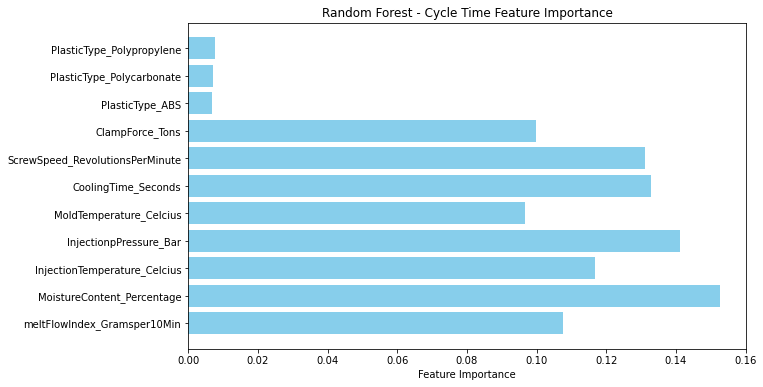

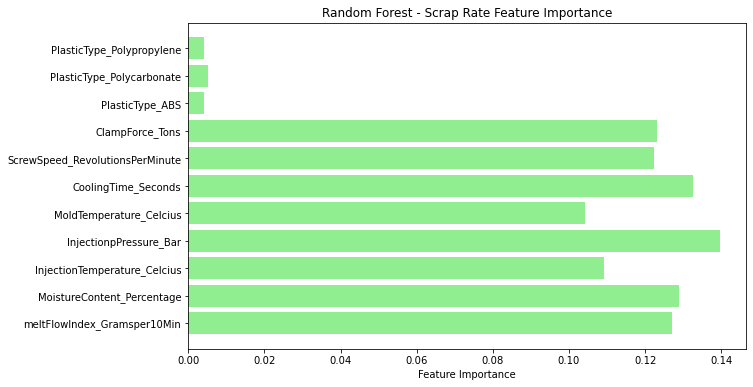

In [22]:
import matplotlib.pyplot as plt

# -----------------------------
# Feature Importance for Cycle Time Model
# -----------------------------
importances_cycle = rf_cycle.feature_importances_
features_cycle = X_train_CycleTime.columns  # use original unscaled DataFrame columns

plt.figure(figsize=(10, 6))
plt.barh(features_cycle, importances_cycle, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Cycle Time Feature Importance")
plt.show()


# -----------------------------
# Feature Importance for Scrap Rate Model
# -----------------------------
importances_scrap = rf_scrap.feature_importances_
features_scrap = X_train_ScrapRate.columns  # use original unscaled DataFrame columns

plt.figure(figsize=(10, 6))
plt.barh(features_scrap, importances_scrap, color='lightgreen')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Scrap Rate Feature Importance")
plt.show()


-- Interpreting feature importance 

The bar chart displays the feature importance for the Random Forest model predicting Cycle Time. MoistureContent_Percentage stands out as the most influential feature, followed closely by InjectionpPressure_Bar, CoolingTime_Seconds, and ScrewSpeed_RevolutionsPerMinute. These four features collectively exert the strongest influence on the Cycle Time. InjectionTemperature_Celcius, meltFlowIndex_Gramsper10Min, MoldTemperature_Celcius, and ClampForce_Tons also show moderate importance. In contrast, the one-hot encoded PlasticType features (Polypropylene, Polycarbonate, and ABS) have very low importance, indicating that the type of plastic has minimal direct impact on the model's prediction of cycle time compared to the other process parameters. This suggests that optimizing parameters like moisture content and injection pressure could be key to controlling cycle time.

The bar chart illustrates the feature importance for the Random Forest model predicting Scrap Rate. InjectionPressure_Bar emerges as the most important feature, closely followed by CoolingTime_Seconds, MoistureContent_Percentage, and meltFlowIndex_Gramsper10Min. These four parameters are the primary drivers of the model's scrap rate predictions. ClampForce_Tons, ScrewSpeed_RevolutionsPerMinute, InjectionTemperature_Celcius, and MoldTemperature_Celcius also demonstrate substantial, albeit slightly lower, importance. Similar to the Cycle Time model, the PlasticType features (Polypropylene, Polycarbonate, and ABS) show very low importance, suggesting that while plastic type might have some inherent effect, the variability in scrap rate is predominantly explained by the fine-tuning of the continuous process parameters. This highlights that controlling injection pressure, cooling time, moisture content, and melt flow index are crucial for minimizing scrap rate.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -----------------------------
# 1. Define objective function
# -----------------------------
def objective(x, model_cycle, model_scrap):
    """
    We want high cycle time (+) and low scrap rate (-)
    So objective = -cycle_time + scrap_rate (minimize this)
    """
    x = np.array(x).reshape(1, -1)
    cycle_pred = model_cycle.predict(x)[0]
    scrap_pred = model_scrap.predict(x)[0]
    return -cycle_pred + scrap_pred  # minimize this

# -----------------------------
# 2. Initial guess (mean of features)
# -----------------------------
X_mean = X_train_CycleTime.mean().values

# -----------------------------
# 3. Define bounds for features
# -----------------------------
bounds = []
for col in X_train_CycleTime.columns:
    bounds.append((X_train_CycleTime[col].min(), X_train_CycleTime[col].max()))

# -----------------------------
# 4. Run optimization for Random Forest
# -----------------------------
result_rf = minimize(
    objective,
    X_mean,
    args=(rf_cycle, rf_scrap),
    bounds=bounds,
    method='L-BFGS-B'
)

optimal_rf = result_rf.x
print("Optimal input values (Random Forest):")
for i, col in enumerate(X_train_CycleTime.columns):
    print(f"{col}: {optimal_rf[i]:.3f}")

# Predict values at optimum
cycle_rf = rf_cycle.predict(optimal_rf.reshape(1, -1))[0]
scrap_rf = rf_scrap.predict(optimal_rf.reshape(1, -1))[0]
print(f"Predicted Cycle Time: {cycle_rf:.3f}, Predicted Scrap Rate: {scrap_rf:.3f}")




Optimal input values (Random Forest):
meltFlowIndex_Gramsper10Min: 17.127
MoistureContent_Percentage: 0.051
InjectionTemperature_Celcius: 248.969
InjectionpPressure_Bar: 14887.751
MoldTemperature_Celcius: 79.644
CoolingTime_Seconds: 24.843
ScrewSpeed_RevolutionsPerMinute: 50.554
ClampForce_Tons: 99.657
PlasticType_ABS: 0.287
PlasticType_Polycarbonate: 0.524
PlasticType_Polypropylene: 0.189
Predicted Cycle Time: 79.719, Predicted Scrap Rate: 1.313


-- Result interpretation

The optimization results, derived from the Random Forest model, provide a set of recommended input parameters aimed at achieving desirable Cycle Time and Scrap Rate outcomes. The optimal settings suggest a meltFlowIndex_Gramsper10Min of 17.127, MoistureContent_Percentage of 0.051, InjectionTemperature_Celcius of 248.969, and InjectionpPressure_Bar of 14887.751. Other key settings include MoldTemperature_Celcius at 79.644, CoolingTime_Seconds at 24.843, ScrewSpeed_RevolutionsPerMinute at 50.554, and ClampForce_Tons at 99.657. The PlasticType is represented by fractional values (ABS: 0.287, Polycarbonate: 0.524, Polypropylene: 0.189), which, in a real-world scenario, would likely translate to selecting the plastic type that corresponds to the highest optimal value, here being Polycarbonate. Under these optimal conditions, the model predicts a Cycle Time of 79.719 seconds and a Scrap Rate of 1.313%. This predicted scrap rate is notably lower than the dataset's average of 2.50%, indicating the potential for significant process improvement by adopting these recommended settings.
Use Arrow Up and Arrow Down to select a turn, Enter to jump to it, and Escape to return to the chat.
